In [14]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\luism\\PycharmProjects\\fruit-feature-extractor\\venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(-0.5, 255.5, 255.5, -0.5)

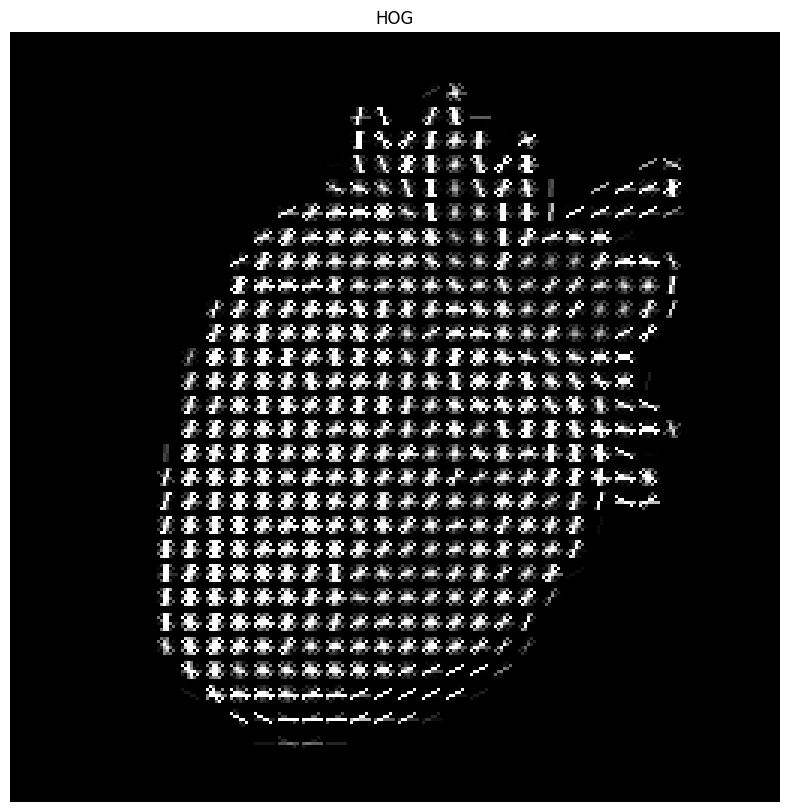

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import hog as hogsk
from skimage import data, exposure


img = cv.imread('database/FRESA/fresa (39).jpg')

image_gaussian = cv.GaussianBlur(img, (3, 3), 0)
image_resized = cv.resize(image_gaussian, (256, 256), interpolation=cv.INTER_AREA)

winSize = (64, 64)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9
hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)


# Calculate HOG. Opencv doesn't offer visualization so skimage is used here.
implot = cv.cvtColor(image_resized, cv.COLOR_BGR2GRAY)
fd, hogimage = hogsk(implot, visualize=True)
hogimage = exposure.rescale_intensity(hogimage, in_range=(0, 10))


plt.figure(figsize=(10, 10))
plt.imshow(hogimage , cmap='gray'), plt.title('HOG')
plt.axis('off')

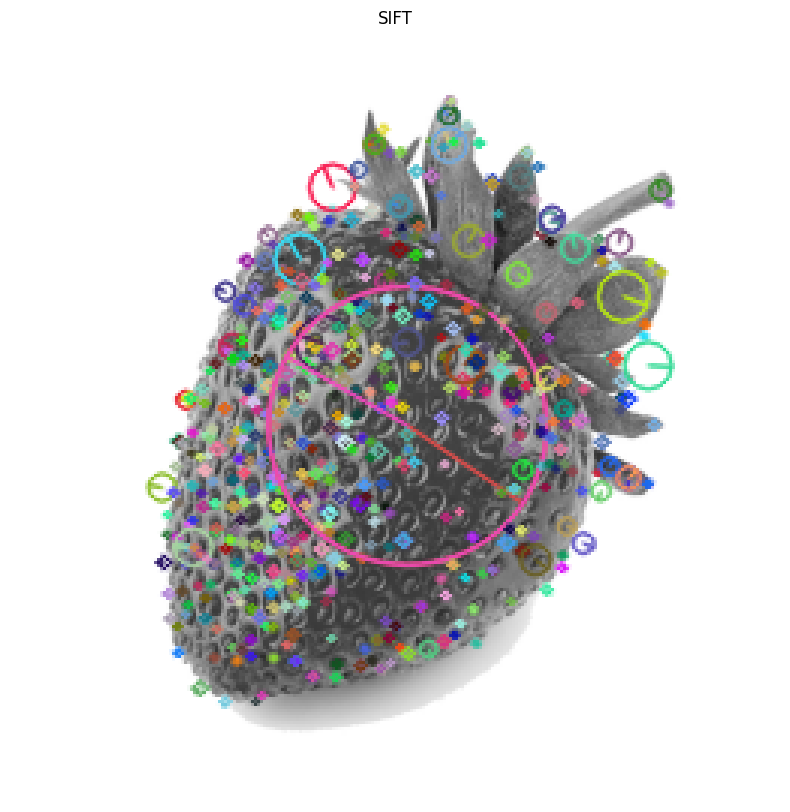

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('database/FRESA/fresa (39).jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
image_gaussian = cv.GaussianBlur(gray, (3, 3), 0)
image_resized = cv.resize(image_gaussian, (256, 256), interpolation=cv.INTER_AREA)



sift = cv.SIFT_create()
kp = sift.detect(image_resized, None)
img = cv.drawKeypoints(image_resized, kp, img)
cv.imwrite('sift_keypoints.jpg', img)

img = cv.drawKeypoints(image_resized, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg', img)

plt.figure(figsize=(10, 10))
plt.imshow(img), plt.title('SIFT')
plt.axis('off')

plt.show()

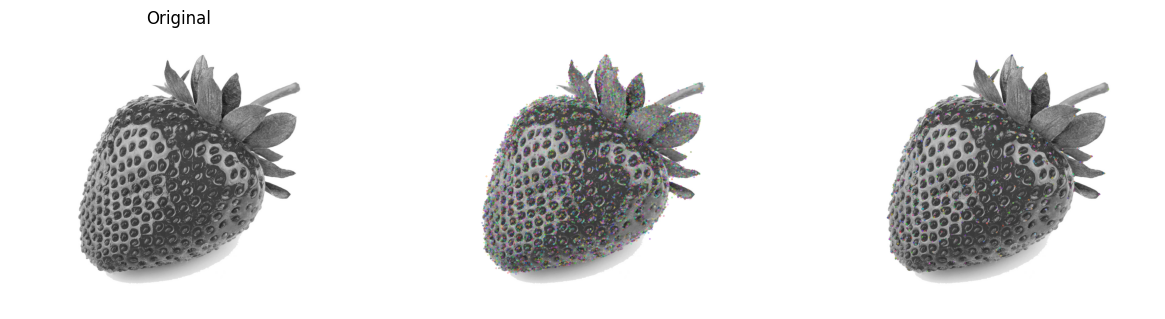

In [18]:
import cv2

img = cv2.imread("database/FRESA/fresa (39).jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

keypoints_sift, descriptors = sift.detectAndCompute(img, None)
# keypoints_surf, descriptors = surf.detectAndCompute(img, None)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)

images_with_descriptors = [cv2.drawKeypoints(img, keypoints_sift, None),
                           # cv2.drawKeypoints(img, keypoints_surf, None),
                           cv2.drawKeypoints(img, keypoints_orb, None)]

plt.figure(figsize=(20, 8))
plt.subplot(141), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.axis('off')

for i in range(len(images_with_descriptors)):
    plt.subplot(142 + i), plt.imshow(images_with_descriptors[i])
    plt.axis('off')
plt.show()